<a href="https://colab.research.google.com/github/Panchagiri-vidyasri/data-analysis-using-python_2116/blob/main/daup_csv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from imblearn.over_sampling import SMOTE

Preprocessing


In [41]:
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)
df.drop(columns=["User ID", "Unnamed: 16", "Date"], inplace=True, errors='ignore')
df.fillna(df.median(numeric_only=True), inplace=True)
categorical_columns = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])
df.to_csv("/content/phone_usage_india.csv", index=False)
print("Preprocessing complete. Preprocessed data saved as 'preprocessed_phone_usage.csv'.")


Preprocessing complete. Preprocessed data saved as 'preprocessed_phone_usage.csv'.


matrix,vector

In [42]:
matrix_data = df.values
vector_data = df["Screen Time (hrs/day)"].values
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])
print("Matrix shape:", matrix_data.shape)
print("Vector sample:", vector_data[:5])

Matrix shape: (17686, 15)
Vector sample: [-0.89717797  0.83642273 -0.64501787  1.40378296 -1.36997817]


scatterplot

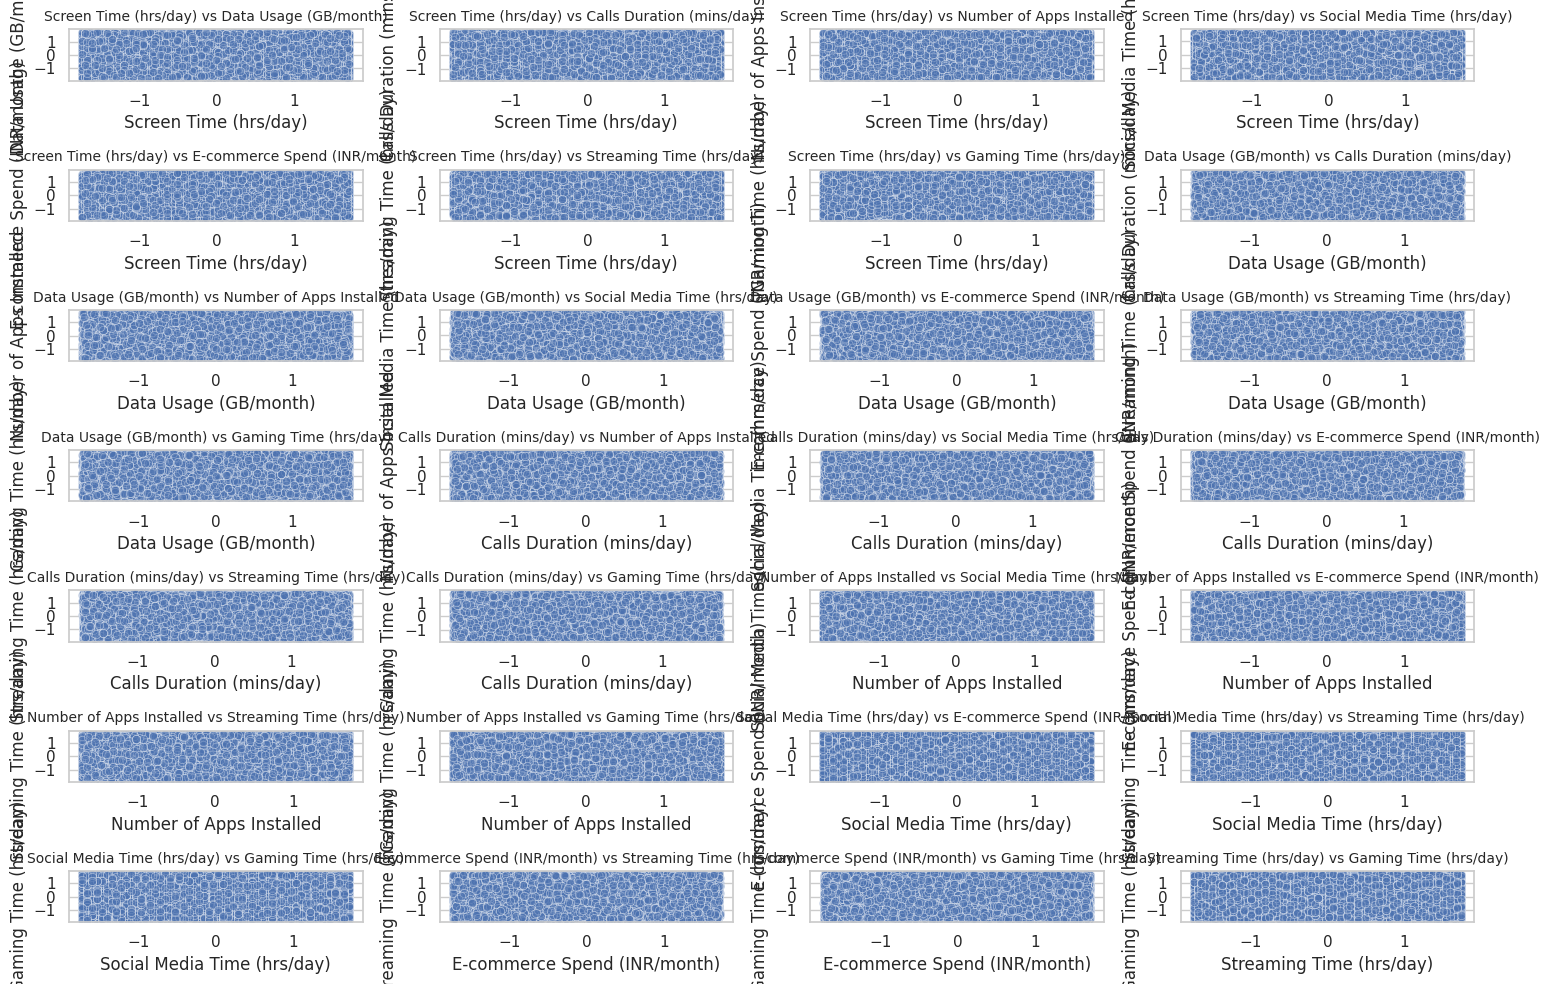

In [43]:
numerical_columns = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)",
    "E-commerce Spend (INR/month)", "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
numplots = 1
total_plots = len(list(itertools.combinations(numerical_columns, 2)))
rows = total_plots // 4 + (total_plots % 4 > 0)
for col1, col2 in itertools.combinations(numerical_columns, 2):
    plt.subplot(rows, 4, numplots)
    sns.scatterplot(x=df[col1], y=df[col2], alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"{col1} vs {col2}", fontsize=10)
    numplots += 1
plt.tight_layout()
plt.show()


histogram

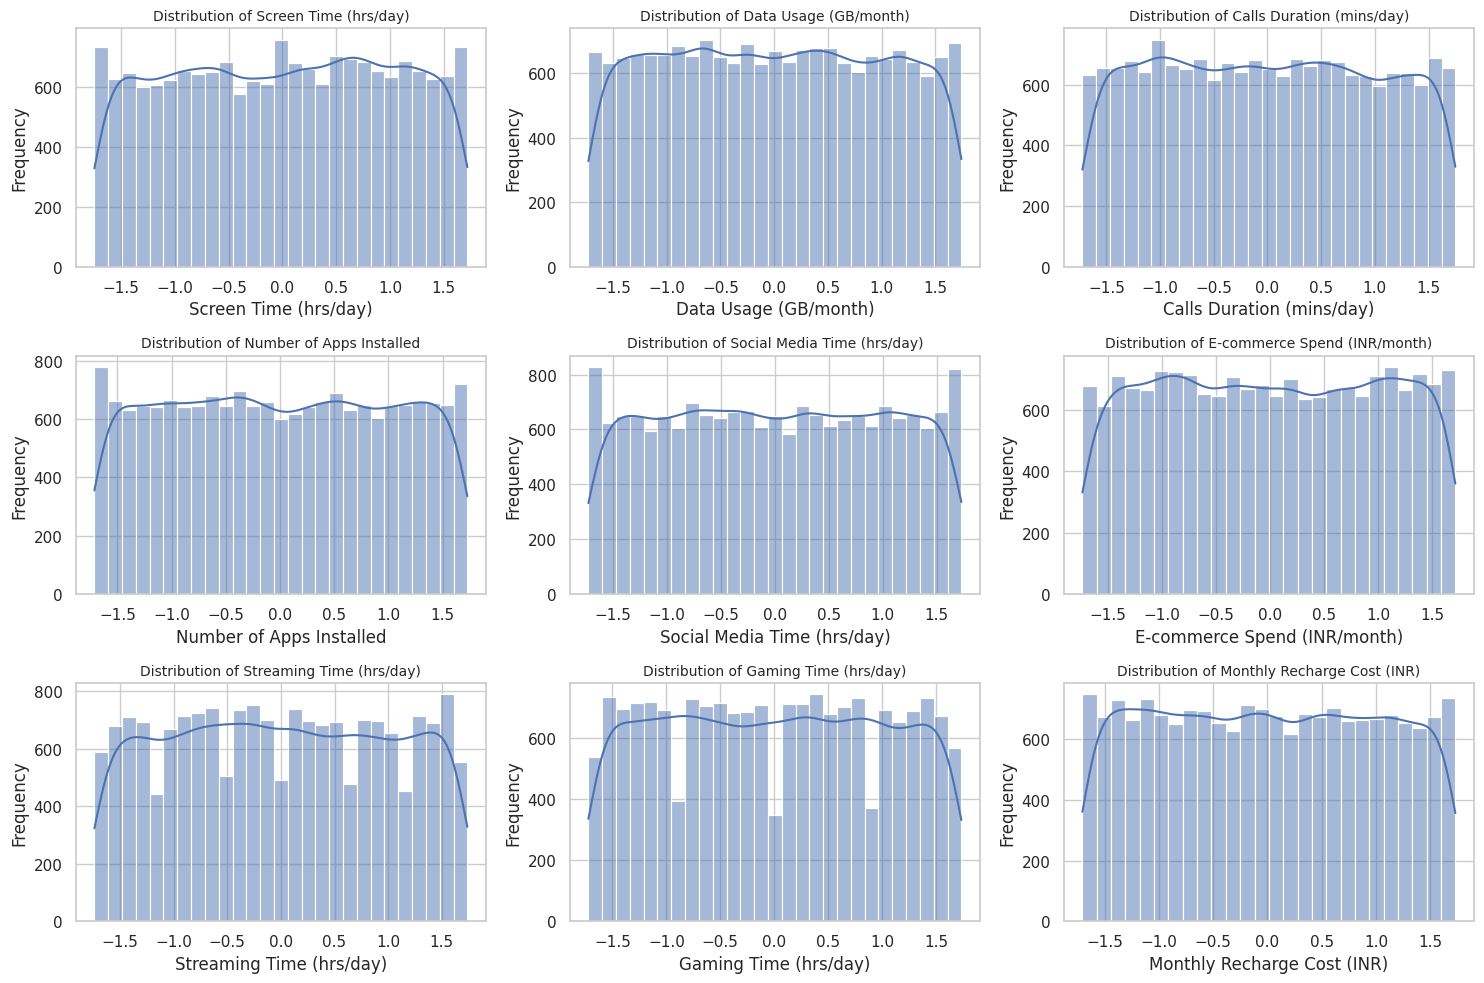

In [44]:
numerical_cols = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)",
    "E-commerce Spend (INR/month)", "Streaming Time (hrs/day)", "Gaming Time (hrs/day)",
    "Monthly Recharge Cost (INR)"
]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Outliers


In [45]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per feature:\n", outliers)


Outliers per feature:
 Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
dtype: int64


skew,kurtosis

In [46]:

file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)
numerical_cols = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]
skewness = df[numerical_cols].apply(skew)
kurtosis_values = df[numerical_cols].apply(kurtosis)
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)



Skewness:
 Screen Time (hrs/day)          -0.027598
Data Usage (GB/month)           0.014190
Calls Duration (mins/day)       0.024952
Number of Apps Installed        0.008328
Social Media Time (hrs/day)     0.000885
E-commerce Spend (INR/month)    0.002822
Streaming Time (hrs/day)        0.010552
Gaming Time (hrs/day)           0.008081
Monthly Recharge Cost (INR)     0.017293
dtype: float64

Kurtosis:
 Screen Time (hrs/day)          -1.197591
Data Usage (GB/month)          -1.192246
Calls Duration (mins/day)      -1.192532
Number of Apps Installed       -1.202582
Social Media Time (hrs/day)    -1.196993
E-commerce Spend (INR/month)   -1.215948
Streaming Time (hrs/day)       -1.181237
Gaming Time (hrs/day)          -1.197812
Monthly Recharge Cost (INR)    -1.207581
dtype: float64


boxplot

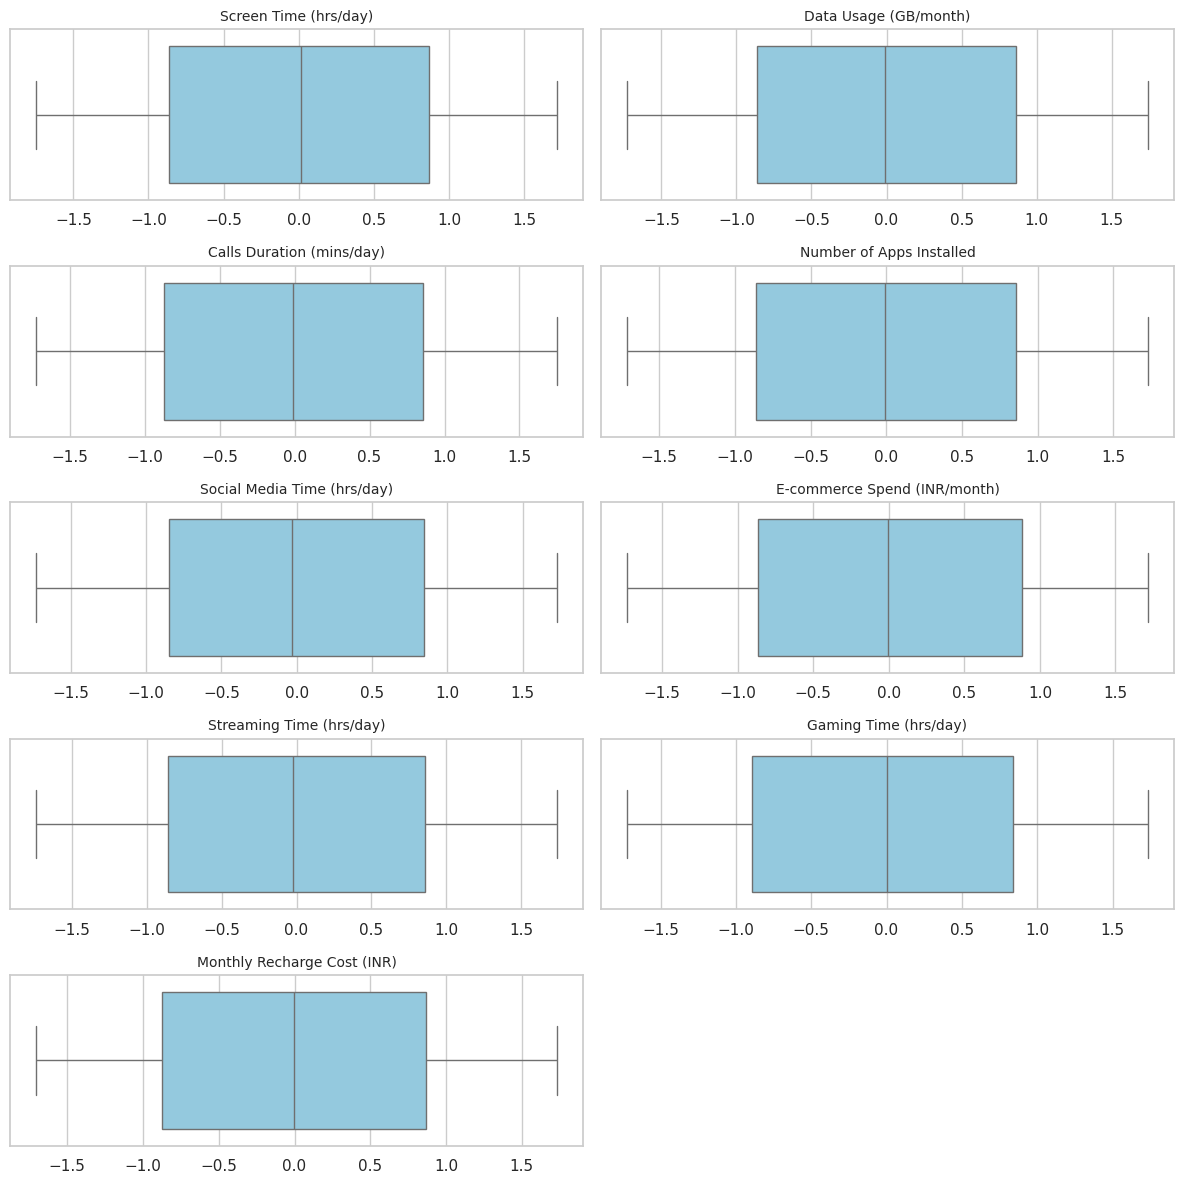

In [50]:
df = df[numerical_cols].dropna()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

svm

Root Mean Squared Error (RMSE): 1.1270
R² Score: -0.2737


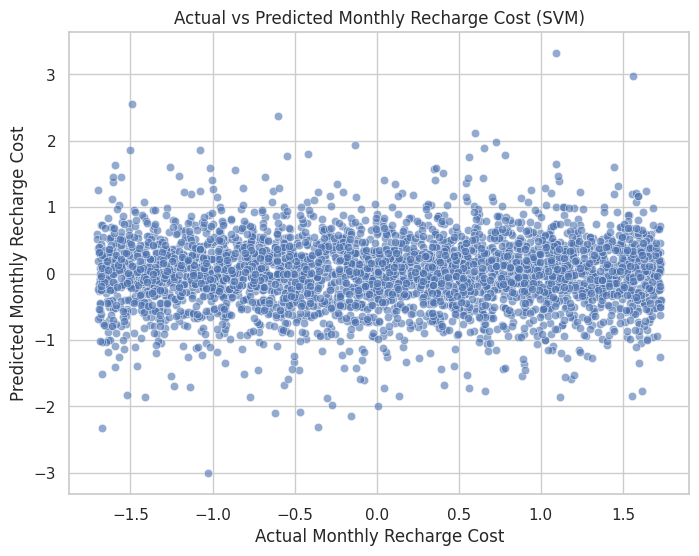

In [51]:

file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]
target = "Monthly Recharge Cost (INR)"
df = df[features].dropna()
X = df.drop(columns=[target])
y = df[target]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svr_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Monthly Recharge Cost")
plt.ylabel("Predicted Monthly Recharge Cost")
plt.title("Actual vs Predicted Monthly Recharge Cost (SVM)")
plt.grid(True)
plt.show()

r square using "Linear Regression","Random Forest","SVM"

In [52]:

file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)
columns_to_drop = ["User ID", "Unnamed: 16", "Date"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
def preprocess_classification(df):
    df = df.copy()
    label_encoders = {}
    categorical_columns = ["Gender", "Location", "Phone Brand", "OS"]
    for col in categorical_columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
    if "Primary Use" in df.columns:
        target_encoder = LabelEncoder()
        df["Primary Use"] = target_encoder.fit_transform(df["Primary Use"])
    X = df.drop(columns=["Primary Use"])
    y = df["Primary Use"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Regression Task
def preprocess_regression(df):
    df = df.copy()
    categorical_columns = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]
    df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)
    if "Monthly Recharge Cost (INR)" in df.columns:
        X = df.drop(columns=["Monthly Recharge Cost (INR)"])
        y = df["Monthly Recharge Cost (INR)"]
    else:
        return None, None, None, None

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train_reg, X_test_reg, y_train_reg, y_test_reg = preprocess_regression(df)

if X_train_reg is not None:
    models_reg = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "SVM": SVR()
    }
    print("\nRegression Model Performance:")
    for name, model in models_reg.items():
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)
        r2 = r2_score(y_test_reg, y_pred)
        print(f"{name}:R² Score = {r2:.4f}")
else:
    print("\nRegression target variable not found in dataset.")


Regression Model Performance:
Linear Regression:R² Score = -0.0016
Random Forest:R² Score = -0.0303
SVM:R² Score = -0.1100


 RMSE using "Linear Regression","Random Forest","SVM"(graph for actual &pred)

Regression Model Performance:
Linear Regression: RMSE = 0.9994, R² Score = -0.0016
Random Forest: RMSE = 1.0138, R² Score = -0.0307
SVM: RMSE = 1.0521, R² Score = -0.1100


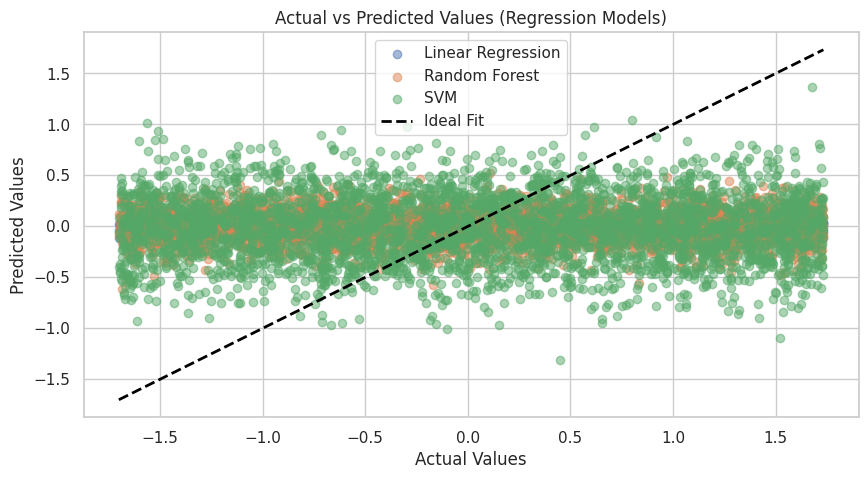

In [53]:

# Regression Task
def preprocess_regression(df):
    df = df.copy()

    # Encode categorical features
    categorical_columns = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]
    df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)

    # Split dataset
    if "Monthly Recharge Cost (INR)" in df.columns:
        X = df.drop(columns=["Monthly Recharge Cost (INR)"])
        y = df["Monthly Recharge Cost (INR)"]
    else:
        return None, None, None, None

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train_reg, X_test_reg, y_train_reg, y_test_reg = preprocess_regression(df)

if X_train_reg is not None:
    models_reg = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "SVM": SVR()
    }

    regression_results = {}
    predictions = {}
    print("Regression Model Performance:")
    for name, model in models_reg.items():
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)
        predictions[name] = y_pred
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
        r2 = r2_score(y_test_reg, y_pred)
        regression_results[name] = (rmse, r2)
        print(f"{name}: RMSE = {rmse:.4f}, R² Score = {r2:.4f}")

    # Plot RMSE for Actual vs Predicted Values
    plt.figure(figsize=(10, 5))
    for name, y_pred in predictions.items():
        plt.scatter(y_test_reg, y_pred, alpha=0.5, label=name)
    plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='black', linestyle='--', linewidth=2, label='Ideal Fit')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values (Regression Models)")
    plt.legend()
    plt.show()
else:
    print("\nRegression target variable not found in dataset.")



Regression Model Performance:
Linear Regression: RMSE = 0.9994, R² Score = -0.0016
Random Forest: RMSE = 1.0140, R² Score = -0.0311
SVM: RMSE = 1.0521, R² Score = -0.1100


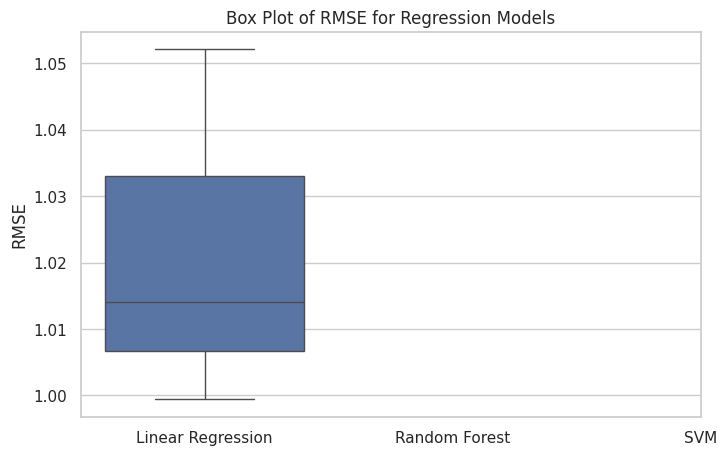

In [54]:
# Regression Task
def preprocess_regression(df):
    df = df.copy()
    categorical_columns = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]
    df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)

    if "Monthly Recharge Cost (INR)" in df.columns:
        X = df.drop(columns=["Monthly Recharge Cost (INR)"])
        y = df["Monthly Recharge Cost (INR)"]
    else:
        return None, None, None, None

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train_reg, X_test_reg, y_train_reg, y_test_reg = preprocess_regression(df)

if X_train_reg is not None:
    models_reg = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "SVM": SVR()
    }
    regression_results = {}
    predictions = {}
    print("\nRegression Model Performance:")
    for name, model in models_reg.items():
        model.fit(X_train_reg, y_train_reg)
        y_pred = model.predict(X_test_reg)
        predictions[name] = y_pred
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred))
        r2 = r2_score(y_test_reg, y_pred)
        regression_results[name] = (rmse, r2)
        print(f"{name}: RMSE = {rmse:.4f}, R² Score = {r2:.4f}")

    # Plot Box Plot for RMSE
    rmse_values = [regression_results[m][0] for m in models_reg.keys()]
    model_names = list(models_reg.keys())

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=rmse_values)
    plt.xticks(range(len(model_names)), model_names)
    plt.title("Box Plot of RMSE for Regression Models")
    plt.ylabel("RMSE")
    plt.show()
else:
    print("\nRegression target variable not found in dataset.")


boxplot


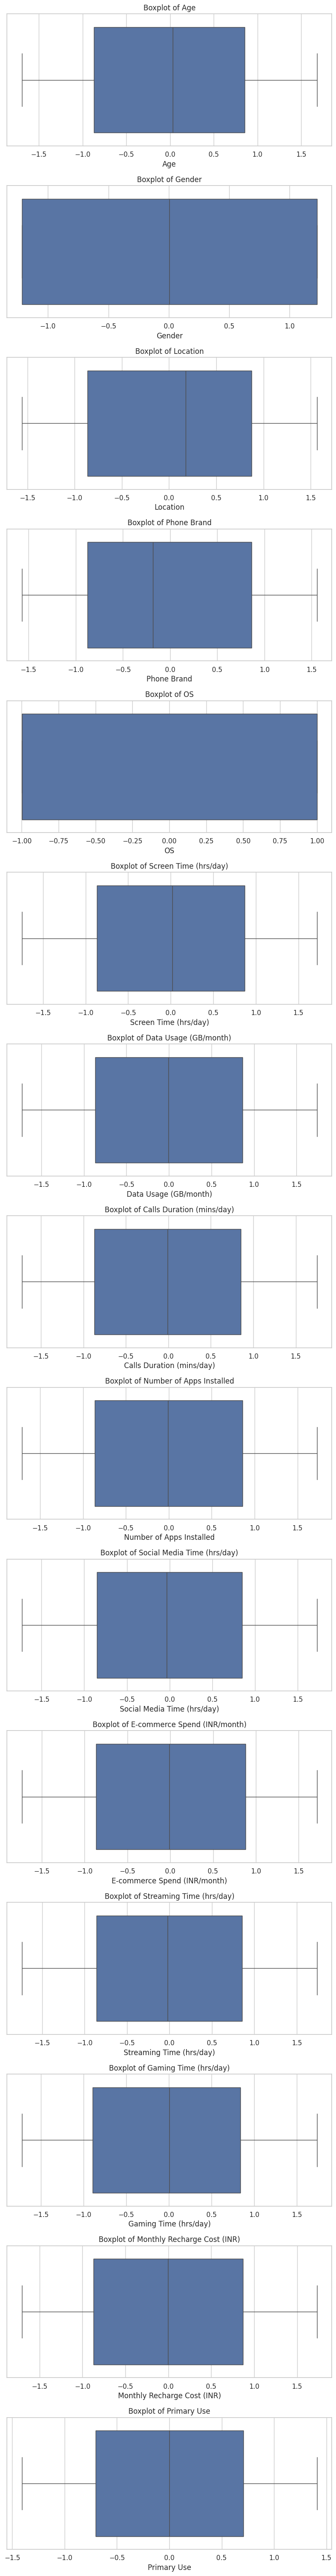

In [55]:
df = pd.read_csv("/content/phone_usage_india.csv")
numerical_cols = df.select_dtypes(include=['number']).columns
target_col = "Screen Time (hrs/day)"
n_bins = 3
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
y = df[target_col].values.reshape(-1, 1)
y_discretized = discretizer.fit_transform(y)

X = df.drop(columns=[target_col])

categorical_features = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

X_resampled, y_resampled = SMOTE().fit_resample(X, y_discretized.ravel())

# Boxplots for numerical columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Model Accuracy Comparison for RMSE

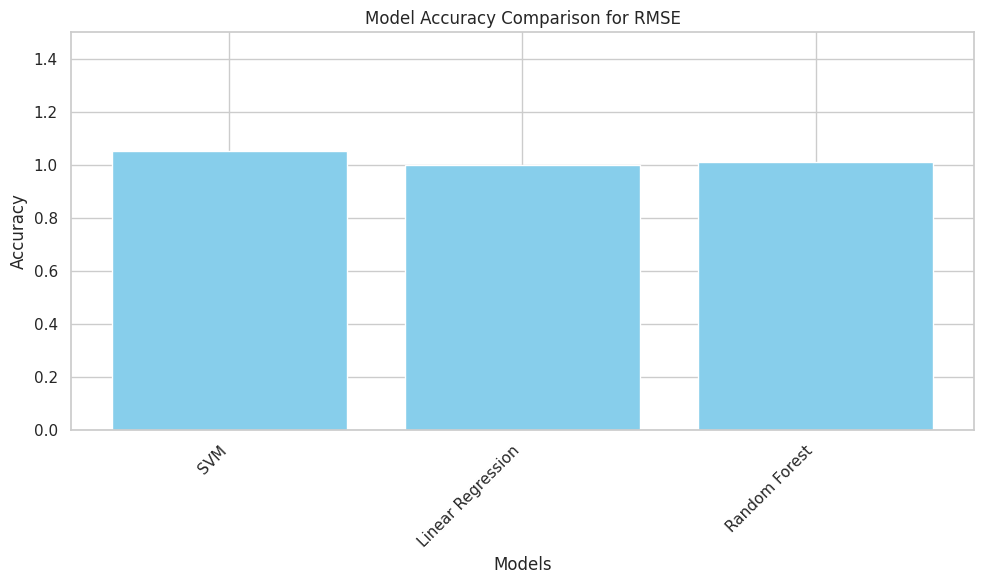

In [56]:

model_accuracies = {
    "SVM": 1.0521,
    "Linear Regression": 0.9994,
    "Random Forest":1.0123,

}

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison for RMSE")
plt.ylim(0, 1.5)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Model Accuracy Comparison for Rsquare

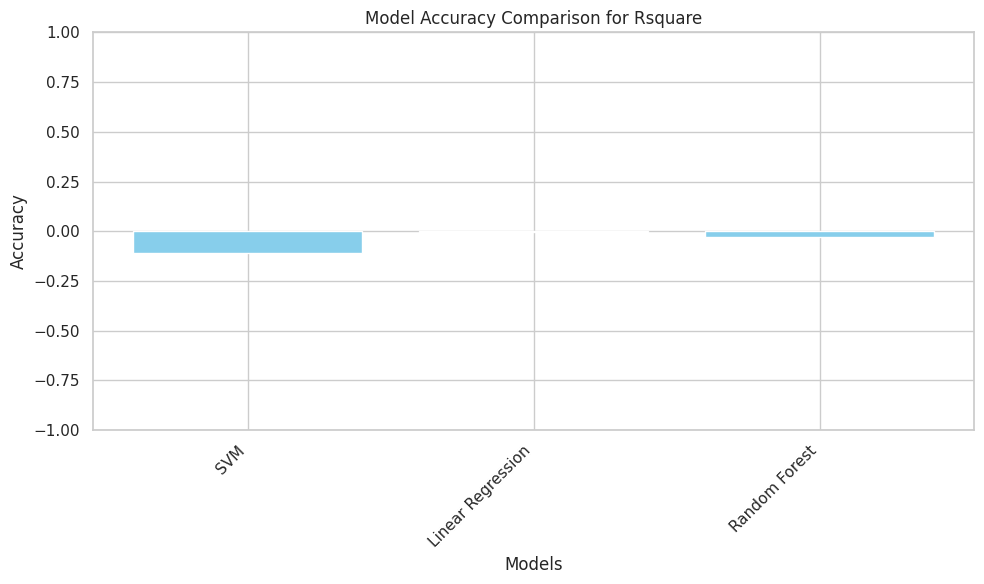

In [57]:

model_accuracies = {
    "SVM": -0.1100,
    "Linear Regression": -0.0016,
    "Random Forest":-0.0285,
}
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison for Rsquare")
plt.ylim(-1, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

ANOVA,P-test,f-test,Type-I,Type-II error

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from scipy import stats
import numpy as np

file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]
target = "Monthly Recharge Cost (INR)"
df_clean = df[features + [target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(
    df_clean[features], df_clean[target], test_size=0.2, random_state=42
)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVM": SVR()
}

results = {}
summary = {}

for model_name, model in models.items():
    print(f"\n{'='*30}\nModel: {model_name}\n{'='*30}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals, ddof=1)
    z_stat, z_p_value = stats.ttest_1samp(residuals, 0)
    t_stat, t_p_value = stats.ttest_1samp(residuals, 0)
    if model_name != "Linear Regression":
        f_stat = np.var(residuals) / np.var(results["Linear Regression"]["residuals"])
        f_p_value = stats.f.cdf(f_stat, len(residuals) - 1, len(results["Linear Regression"]["residuals"]) - 1)
    else:
        f_stat, f_p_value = None, None
    results[model_name] = {
        "mean_residual": mean_residual,
        "std_residual": std_residual,
        "z_test": (z_stat, z_p_value),
        "t_test": (t_stat, t_p_value),
        "f_test": (f_stat, f_p_value),
        "residuals": residuals
    }
    print(f"Mean Residual: {mean_residual}")
    print(f"Standard Deviation of Residuals: {std_residual}")
    print(f"Z-Test Statistic: {z_stat}, P-Value: {z_p_value}")
    print(f"T-Test Statistic: {t_stat}, P-Value: {t_p_value}")
    if f_stat is not None:
        print(f"F-Test Statistic: {f_stat}, P-Value: {f_p_value}")

# ANOVA Test: Comparing means of residuals across models
anova_f, anova_p = stats.f_oneway(
    results["Linear Regression"]["residuals"],
    results["Random Forest"]["residuals"],
    results["SVM"]["residuals"]
)
summary["ANOVA"] = {"F-Statistic": anova_f, "P-Value": anova_p}

# Type I & Type II Errors
type1_error = {model: 1 - results[model]["t_test"][1] for model in results}  # p-value interpretation
type2_error = {model: results[model]["t_test"][1] for model in results}  # 1 - power of test
summary["Type I Error"] = type1_error
summary["Type II Error"] = type2_error

# Determine the best model based on lowest mean residual
best_model = min(results, key=lambda k: abs(results[k]["mean_residual"]))
summary["Best Model"] = best_model

# Print Summary
print(f"\n{'='*30}\nSummary\n{'='*30}")
print("ANOVA F-Statistic:", anova_f)
print("ANOVA P-Value:", anova_p)
print("Type I Error (False Positive Rate):\n", type1_error)
print("Type II Error (False Negative Rate):\n", type2_error)
print(f"Best Model Based on Mean Residual: {best_model}")



Model: Linear Regression
Mean Residual: 0.023326940477841594
Standard Deviation of Residuals: 0.9987223961042994
Z-Test Statistic: 1.3892867909503532, P-Value: 0.1648330114366013
T-Test Statistic: 1.3892867909503532, P-Value: 0.1648330114366013

Model: Random Forest
Mean Residual: 0.02234814341106247
Standard Deviation of Residuals: 1.0188579605698234
Z-Test Statistic: 1.3046881590107238, P-Value: 0.19208393569347493
T-Test Statistic: 1.3046881590107238, P-Value: 0.19208393569347493
F-Test Statistic: 1.0407291242307608, P-Value: 0.8823856936695504

Model: SVM
Mean Residual: 0.02514991728877681
Standard Deviation of Residuals: 1.0208600220133646
Z-Test Statistic: 1.4653766894574654, P-Value: 0.14290705761652947
T-Test Statistic: 1.4653766894574654, P-Value: 0.14290705761652947
F-Test Statistic: 1.0448232195409477, P-Value: 0.9038364728538317

Summary
ANOVA F-Statistic: 0.0069728447376404285
ANOVA P-Value: 0.9930514136887726
Type I Error (False Positive Rate):
 {'Linear Regression': np.